# Vehicle Characteristics 

How does vehicle age impact the probability of a claim? 
 * Older vehicles may have higher claim rates; 
plot claim rate vs. vehicle age.

In [3]:
import pandas as pd
df = pd.read_csv("data/cleaned_data.csv")
df.head()

In [13]:
df["vehicle_age"]

0        1.2
1        1.8
2        0.2
3        0.4
4        1.0
        ... 
58587    2.6
58588    2.2
58589    2.2
58590    3.6
58591    0.4
Name: vehicle_age, Length: 58592, dtype: float64

In [14]:
df["claim_status"]

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: claim_status, Length: 58592, dtype: int64

In [47]:
age_claim_rate = (
    df.groupby(df["vehicle_age"].round().astype("Int64"))["claim_status"]
      .agg(claim_rate="mean", number_cars="count")
      .reset_index()
      .sort_values("vehicle_age")
)

age_claim_rate

,vehicle_age,claim_rate,number_cars
0,0,0.069431,16808
1,1,0.066319,17461
2,2,0.065085,13444
3,3,0.052358,8652
4,4,0.045480,1803
5,5,0.027559,254
6,6,0.025641,117
7,7,0.100000,30
8,8,0.000000,10
9,9,0.000000,5


<Axes: xlabel='vehicle_age', ylabel='claim_rate'>

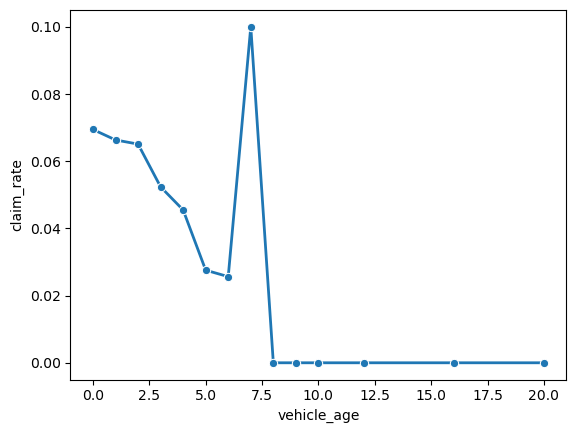

In [23]:
import seaborn as sns
sns.lineplot(
    data=age_claim_rate,
    x="vehicle_age",
    y="claim_rate",
    marker="o",
    linewidth=2,
)

In [24]:
#bins = [0, 2, 5, 8, 20]
#labels = ["0-2", "3-5", "6-8", "9+"]

#df["age_group"] = pd.cut(df["vehicle_age"], bins=bins, labels=labels, include_lowest=True)


In [57]:
if "age_group" in df.columns:
    df = df.drop(columns=["age_group"])

# create labels
label_0_2 = (df["vehicle_age"] <= 2) & (df["vehicle_age"] >= 0)
label_3_5 = (df["vehicle_age"] > 2) & (df["vehicle_age"] <= 5)
label_6_8 = (df["vehicle_age"] > 5) & (df["vehicle_age"] <= 8)
label_9plus = (df["vehicle_age"] > 8)

# label asigned 
df.loc[label_0_2, "age_group"] = "0–2"
df.loc[label_3_5, "age_group"] = "3–5"
df.loc[label_6_8, "age_group"] = "6–8"
df.loc[label_9plus, "age_group"] = "9+"

# see the result
print(df["age_group"].value_counts(dropna=False))

age_group
0–2    42765
3–5    15604
6–8      209
9+        14
Name: count, dtype: int64


In [58]:
age_group_rate = (
    df.groupby("age_group", observed=True)["claim_status"]
      .agg(claim_rate="mean", n="count")
      .reset_index()
)
age_group_rate

,age_group,claim_rate,n
0,0–2,0.067368,42765
1,3–5,0.055114,15604
2,6–8,0.033493,209
3,9+,0.000000,14


<Axes: xlabel='age_group', ylabel='claim_rate'>

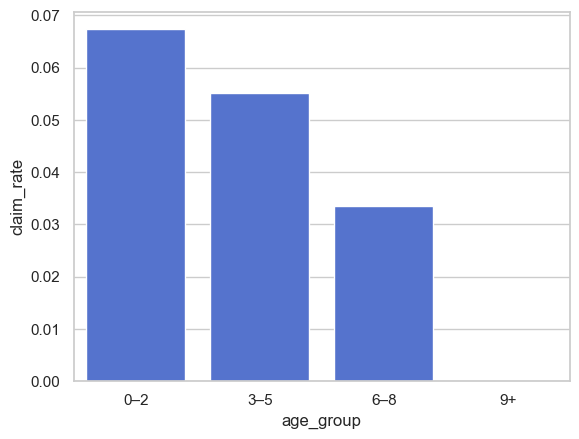

In [59]:
sns.barplot(
    data=age_group_rate,
    x="age_group",
    y="claim_rate",
    color="royalblue"
)
